In [5]:
import pandas as pd
import numpy as np

Размеченный датасет взят [отсюда](https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv)

In [6]:
tweets = pd.read_csv('../data/Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Описание Датасета

In [7]:
tweets.shape

(14640, 15)

In [8]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Нас будут интересовать лишь столбцы с текстом и классификацией твитов

In [9]:
df = pd.DataFrame(tweets.loc[:,  ['text', 'airline_sentiment']])
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df['airline_sentiment'] = df['airline_sentiment'].map({'positive': 2,
                                                       'neutral': 1, 'negative': 0})

0 - Негативный твит
1 - Нейтральный твит
2 - Положительный твит

In [11]:
df['airline_sentiment'].value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

In [12]:
df.rename(columns = {'airline_sentiment':'sentiment'}, inplace=True)
df.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [13]:
X = df['text'].to_list()
y = df['sentiment']

## Предобработка текста

In [14]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import pymorphy2
stopwords = stopwords.words("english")
morph = pymorphy2.MorphAnalyzer()

In [15]:
punct_marks = string.punctuation + "—" + "«" + "»" + "`" + "``" + "..." + "“" \
+ "''" + "”" + '’' + '…'
auxiliary_pos = ['NPRO', 'PREP', 'CONJ', 'PRCL', 'INTJ']
for i in range(len(X)):
    X[i] = re.sub(r'@', '', X[i])  # удаление @
    X[i] = re.sub('http://\S+|https://\S+', '', X[i])  # удаление ссылок
    X[i] = re.sub('http[s]?://\S+', '', X[i])
    X[i] = word_tokenize(X[i])  # токенизация
    X[i] = [morph.parse(word)[0].normal_form for word in X[i]]  # лемматизация
    X[i] = [word.lower() for word in X[i] if word not in punct_marks]
    # нижний регистр и знаки препинания
    X[i] = [word for word in X[i] if morph.parse(word[0])[0].tag.POS not in auxiliary_pos]
    # удаление слов служебных частей речи

In [16]:
X = [' '.join(text) for text in X]

In [17]:
X[:5]

['virginamerica what dhepburn said',
 "virginamerica plus you 've added commercials to the experience tacky",
 "virginamerica i did n't today must mean i need to take another trip",
 "virginamerica it 's really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse",
 "virginamerica and it 's a really big bad thing about it"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Мешок н-грамм

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

In [20]:
n_grams = [(1, i) for i in range(1, 9)]
temp_table = {'type': [], 'param': [], 'precision': [], 'recall': [],
              'accuracy': [], 'f_1': []}

In [21]:
from sklearn.metrics import classification_report

In [22]:
clf = MultinomialNB()
for param in n_grams:
    vectorizer = CountVectorizer(ngram_range=param)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    
    clf.fit(X_train_vectorized, y_train)
    y_pred = clf.predict(X_test_vectorized)
    
    temp_table['type'].append('n-grams')
    temp_table['param'].append(param)
    temp_table['precision'].append(precision_score(y_test, y_pred, average='macro'))
    temp_table['recall'].append(recall_score(y_test, y_pred, average='macro'))
    temp_table['accuracy'].append(accuracy_score(y_test, y_pred))
    temp_table['f_1'].append(f1_score(y_test, y_pred, average='macro'))

In [23]:
n_grams_table = pd.DataFrame.from_dict(temp_table)
n_grams_table

,type,param,precision,recall,accuracy,f_1
0,n-grams,"(1, 1)",0.767058,0.605234,0.759106,0.647163
1,n-grams,"(1, 2)",0.806666,0.543497,0.733651,0.583758
2,n-grams,"(1, 3)",0.809387,0.508971,0.715439,0.542486
3,n-grams,"(1, 4)",0.803249,0.495886,0.708402,0.525111
4,n-grams,"(1, 5)",0.802649,0.486398,0.703228,0.512773
5,n-grams,"(1, 6)",0.809522,0.482148,0.700952,0.507180
6,n-grams,"(1, 7)",0.809737,0.477970,0.698882,0.501816
7,n-grams,"(1, 8)",0.808533,0.476050,0.697848,0.499149


Мешок n-грамм с параметром (1, 1) это мешок слов

## Мешок символьных н-грамм

In [24]:
n_ranges = []
for i in range(8, 11):
    for j in range(2, 6):
        n_ranges.append((j, i))
temp_table = {'type': [], 'param': [], 'precision': [], 'recall': [],
              'accuracy': [], 'f_1': []}

In [25]:
for param in n_ranges:
    char_vectorizer = CountVectorizer(ngram_range=param, analyzer='char')
    X_train_vectorized = char_vectorizer.fit_transform(X_train)
    X_test_vectorized = char_vectorizer.transform(X_test)
    
    clf2 = MultinomialNB()
    clf2.fit(X_train_vectorized, y_train)
    y_pred = clf2.predict(X_test_vectorized)
    
    temp_table['type'].append('n-char-grams')
    temp_table['param'].append(param)
    temp_table['precision'].append(precision_score(y_test, y_pred, average='macro'))
    temp_table['recall'].append(recall_score(y_test, y_pred, average='macro'))
    temp_table['accuracy'].append(accuracy_score(y_test, y_pred))
    temp_table['f_1'].append(f1_score(y_test, y_pred, average='macro'))
n_char_grams_table = pd.DataFrame.from_dict(temp_table)
n_char_grams_table

,type,param,precision,recall,accuracy,f_1
0,n-char-grams,"(2, 8)",0.792329,0.554576,0.738204,0.595808
1,n-char-grams,"(3, 8)",0.791787,0.575460,0.748551,0.617836
2,n-char-grams,"(4, 8)",0.787134,0.589689,0.754967,0.631899
3,n-char-grams,"(5, 8)",0.785248,0.600805,0.759727,0.643017
4,n-char-grams,"(2, 9)",0.797269,0.537478,0.729925,0.576459
5,n-char-grams,"(3, 9)",0.794701,0.560450,0.741101,0.602283
6,n-char-grams,"(4, 9)",0.789621,0.574642,0.747930,0.615653
7,n-char-grams,"(5, 9)",0.785117,0.591185,0.755174,0.632582
8,n-char-grams,"(2, 10)",0.799648,0.526034,0.723717,0.562485
9,n-char-grams,"(3, 10)",0.796797,0.548778,0.735513,0.588882


## TF-IDF

In [26]:
ranges = [(1, i) for i in range(3, 5)]
max_dfs = [round(float(0.65 + i*0.1), 2) for i in range(3)]
min_dfs = [i for i in range(1, 5)]

temp_table = {'type': [], 'param': [], 'precision': [], 'recall': [],
              'accuracy': [], 'f_1': []}

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
for rang in ranges:
    for max_df in max_dfs:
        for min_df in min_dfs:
            tfidf_vectorizer = TfidfVectorizer(ngram_range=rang,
                                               max_df=max_df, min_df=min_df)
            X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
            X_test_vectorized = tfidf_vectorizer.transform(X_test)
            
            clf3 = MultinomialNB()
            clf3.fit(X_train_vectorized, y_train)
            y_pred = clf3.predict(X_test_vectorized)
            
            temp_table['type'].append('tf-idf')
            temp_table['param'].append(f"{rang}, {max_df}, {min_df}")
            temp_table['precision'].append(precision_score(y_test, y_pred, average='macro'))
            temp_table['recall'].append(recall_score(y_test, y_pred, average='macro'))
            temp_table['accuracy'].append(accuracy_score(y_test, y_pred))
            temp_table['f_1'].append(f1_score(y_test, y_pred, average='macro'))
tf_idf_table = pd.DataFrame.from_dict(temp_table)
tf_idf_table

,type,param,precision,recall,accuracy,f_1
0,tf-idf,"(1, 3), 0.65, 1",0.809507,0.383606,0.648593,0.353293
1,tf-idf,"(1, 3), 0.65, 2",0.800617,0.451137,0.683568,0.461902
2,tf-idf,"(1, 3), 0.65, 3",0.806055,0.501304,0.709851,0.531423
3,tf-idf,"(1, 3), 0.65, 4",0.799891,0.537306,0.727856,0.576369
4,tf-idf,"(1, 3), 0.75, 1",0.809507,0.383606,0.648593,0.353293
5,tf-idf,"(1, 3), 0.75, 2",0.800617,0.451137,0.683568,0.461902
6,tf-idf,"(1, 3), 0.75, 3",0.806055,0.501304,0.709851,0.531423
7,tf-idf,"(1, 3), 0.75, 4",0.799891,0.537306,0.727856,0.576369
8,tf-idf,"(1, 3), 0.85, 1",0.809507,0.383606,0.648593,0.353293
9,tf-idf,"(1, 3), 0.85, 2",0.800617,0.451137,0.683568,0.461902


## Выводы

In [29]:
res = pd.concat([n_grams_table, n_char_grams_table, tf_idf_table], ignore_index=True)

In [30]:
res

,type,param,precision,recall,accuracy,f_1
0,n-grams,"(1, 1)",0.767058,0.605234,0.759106,0.647163
1,n-grams,"(1, 2)",0.806666,0.543497,0.733651,0.583758
2,n-grams,"(1, 3)",0.809387,0.508971,0.715439,0.542486
3,n-grams,"(1, 4)",0.803249,0.495886,0.708402,0.525111
4,n-grams,"(1, 5)",0.802649,0.486398,0.703228,0.512773
5,n-grams,"(1, 6)",0.809522,0.482148,0.700952,0.507180
6,n-grams,"(1, 7)",0.809737,0.477970,0.698882,0.501816
7,n-grams,"(1, 8)",0.808533,0.476050,0.697848,0.499149
8,n-char-grams,"(2, 8)",0.792329,0.554576,0.738204,0.595808
9,n-char-grams,"(3, 8)",0.791787,0.575460,0.748551,0.617836


In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Распределение по каждому типу векторизации

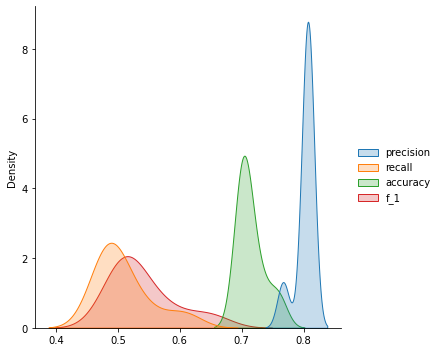

In [32]:
sns.displot(data=res[res['type']=='n-grams'], kind='kde', fill=True);

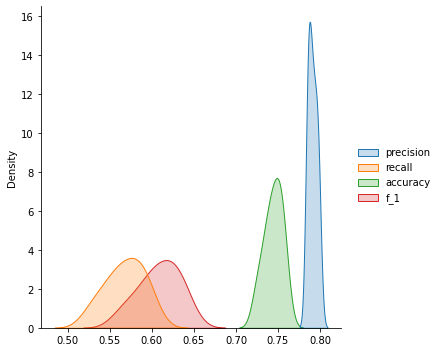

In [33]:
sns.displot(data=res[res['type']=='n-char-grams'], kind='kde', fill=True);

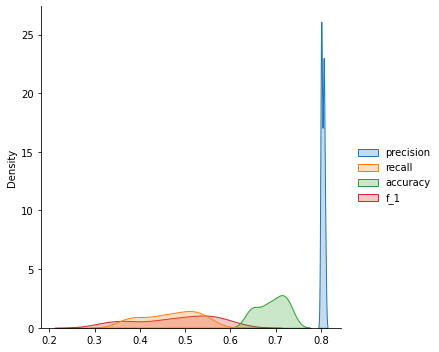

In [34]:
sns.displot(data=res[res['type']=='tf-idf'], kind='kde', fill=True);

### Распределение по каждой метрике

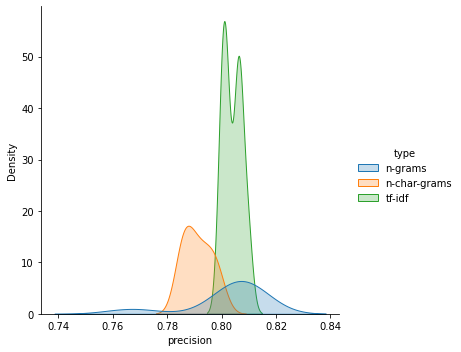

In [35]:
sns.displot(data=res, x='precision', hue='type', kind='kde', fill=True);

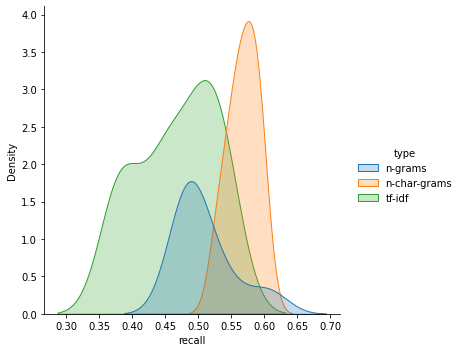

In [36]:
sns.displot(data=res, x='recall', hue='type', kind='kde', fill=True);

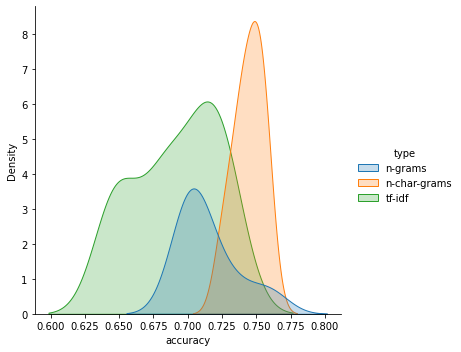

In [37]:
sns.displot(data=res, x='accuracy', hue='type', kind='kde', fill=True);

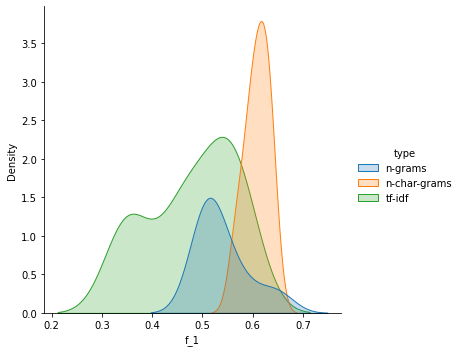

In [38]:
sns.displot(data=res, x='f_1', hue='type', kind='kde', fill=True);

### 3 лучших векторизации по каждой метрике

In [39]:
res.sort_values(by='precision', ascending=False)[:3]

,type,param,precision,recall,accuracy,f_1
6,n-grams,"(1, 7)",0.809737,0.477970,0.698882,0.501816
5,n-grams,"(1, 6)",0.809522,0.482148,0.700952,0.507180
28,tf-idf,"(1, 3), 0.85, 1",0.809507,0.383606,0.648593,0.353293


In [40]:
res.sort_values(by='recall', ascending=False)[:3]

,type,param,precision,recall,accuracy,f_1
0,n-grams,"(1, 1)",0.767058,0.605234,0.759106,0.647163
11,n-char-grams,"(5, 8)",0.785248,0.600805,0.759727,0.643017
15,n-char-grams,"(5, 9)",0.785117,0.591185,0.755174,0.632582


In [41]:
res.sort_values(by='accuracy', ascending=False)[:3]

,type,param,precision,recall,accuracy,f_1
11,n-char-grams,"(5, 8)",0.785248,0.600805,0.759727,0.643017
0,n-grams,"(1, 1)",0.767058,0.605234,0.759106,0.647163
15,n-char-grams,"(5, 9)",0.785117,0.591185,0.755174,0.632582


In [42]:
res.sort_values(by='f_1', ascending=False)[:3]

,type,param,precision,recall,accuracy,f_1
0,n-grams,"(1, 1)",0.767058,0.605234,0.759106,0.647163
11,n-char-grams,"(5, 8)",0.785248,0.600805,0.759727,0.643017
15,n-char-grams,"(5, 9)",0.785117,0.591185,0.755174,0.632582


__Показатель precision постепенно растёт у мешка n-грамм при увеличении параметра n. Это может быть связано с удачным (для данного векторизатора) разделением на обучающую и тестовую выборки. У tf-idf данная метрика колеблется у одного значения. Остальные метрики имеют примерно одинаковое распределение, что может объясняться математически.__  


__Мешок n-грамм даёт в среднем лучшие показатели при параметрах (1, 1), (1, 2) и (1, 3). Мешок символьных n-грамм при (5, 8) и (5, 9).__  


__Самыми лучшими векторизаторами для данного датасета получились: n-gramm (1, 1) и n-char-gram (5, 8), (5, 9).__

__Не самые высокие показатели метрик могут быть следствием не самой точной изначальной классификации твитов, например, в исходном датасете некоторые твиты относятся к какому-то классу с точностью всего лишь 0.34, что крайне мало.__